In [2]:
import pandas as pd

# Load CSV files
call_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Updated_Call_log.csv')
user_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/User_experience.csv')
res_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Call_Resolution_type.csv')
type_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Call_Type.csv')
plan_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Wireless_Plans.csv')

In [4]:
# Filtering the call_df to include only emotion datat = "anger"
anger_df = call_df[call_df['Emotion'] == 'anger']

In [6]:
# Counting the number of angry calls for each agent
calls_per_agent = anger_df['Agent_ID'].value_counts().reset_index()
calls_per_agent.columns = ['Agent_ID', 'Angry_Calls_Count']

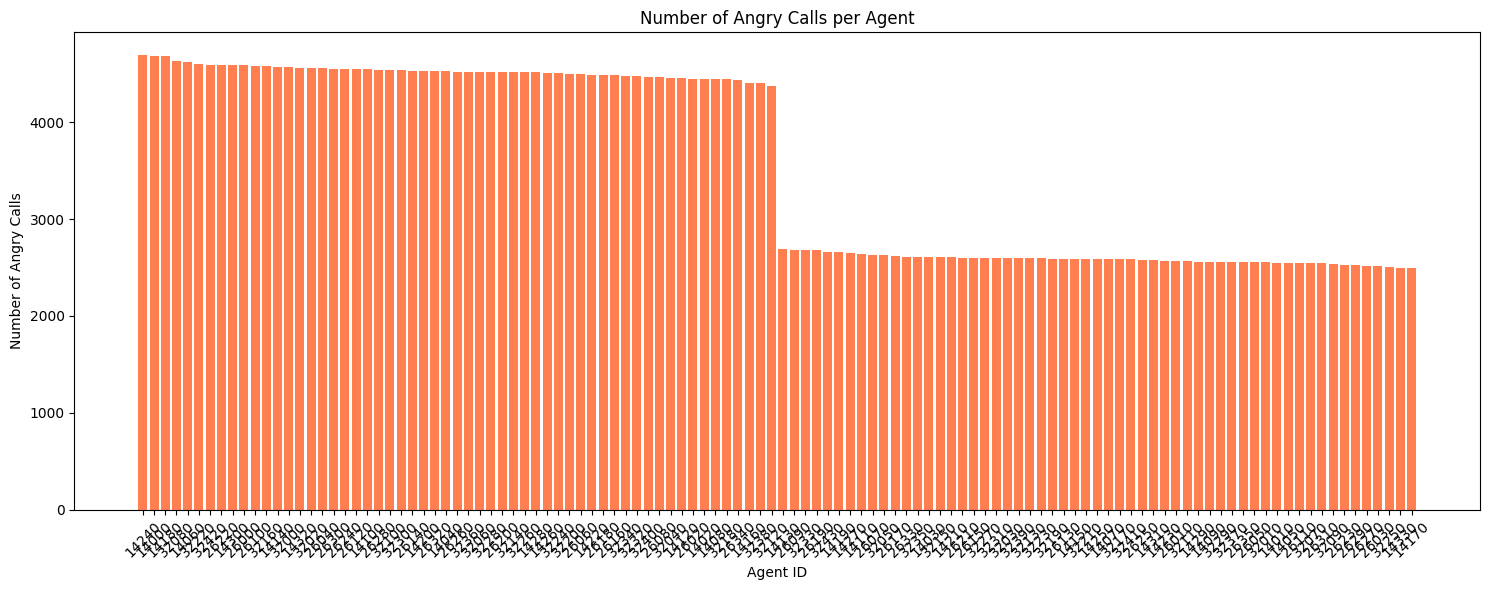

In [7]:
import matplotlib.pyplot as plt

# Plotting the number of angry calls per agent
plt.figure(figsize=(15, 6))
plt.bar(calls_per_agent['Agent_ID'].astype(str), calls_per_agent['Angry_Calls_Count'], color='coral')
plt.title('Number of Angry Calls per Agent')
plt.xlabel('Agent ID')
plt.ylabel('Number of Angry Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Merging the main call_df with res_df on Call_resolution_ID to get resolution descriptions for all calls
all_resolutions = call_df.merge(res_df, on="Call_resolution_ID", how="left")

# Counting the number of occurrences for each resolution type grouped by emotion
emotion_resolution_counts = all_resolutions.groupby('Emotion')['Call_resolution_Description'].value_counts().unstack().fillna(0).astype(int)

emotion_resolution_counts


Call_resolution_Description,Call resolved by agent,Escalated to Supervisor,Transferred to other agent
Emotion,,,
anger,303917,41900,59618
fear,51707,7121,10144
happiness,65260,8993,12744
neutral,535154,73945,103800
sadness,51946,7032,9971


In [12]:
# Calculating the percentages of each resolution type within each emotion
emotion_resolution_percent_within = (emotion_resolution_counts.divide(emotion_resolution_counts.sum(axis=1), axis=0)) * 100
emotion_resolution_percent_within = emotion_resolution_percent_within.round(2)

emotion_resolution_percent_within


Call_resolution_Description,Call resolved by agent,Escalated to Supervisor,Transferred to other agent
Emotion,,,
anger,74.96,10.33,14.70
fear,74.97,10.32,14.71
happiness,75.01,10.34,14.65
neutral,75.07,10.37,14.56
sadness,75.34,10.20,14.46


In [13]:
# Grouping by resolution description and calculating the average talk time and queue time
avg_time_per_resolution = all_resolutions.groupby('Call_resolution_Description')[['Talk_Time', 'Queue_Time']].mean().round(2)

avg_time_per_resolution


,Talk_Time,Queue_Time
Call_resolution_Description,,
Call resolved by agent,846.33,15.46
Escalated to Supervisor,850.43,15.56
Transferred to other agent,863.57,16.07


In [21]:
# Grouping by call type description and calculating the average talk time and queue time
avg_time_per_call_type = all_calls_with_types.groupby('Call_Type_Description')[['Talk_Time', 'Queue_Time']].mean().round(2)
avg_time_per_call_type = avg_time_per_call_type.sort_values(by='Talk_Time', ascending=False)

avg_time_per_call_type


,Talk_Time,Queue_Time
Call_Type_Description,,
General Inquiries,849.96,15.55
Products & Services,849.58,16.19
Service Changes,849.07,15.58
Technical Support,848.90,14.94
Billing & Payments,848.42,15.61
